In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Carga del dataset

In [32]:
datos= pd.read_csv("online_shoppers_intention.csv")

In [33]:
datos.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1.0,1.0,1.0,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2.0,1.0,2.0,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1.0,9.0,3.0,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3.0,1.0,4.0,Returning_Visitor,True,False


EDA

In [34]:
datos.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12067.000000,12067.000000,12067.000000,12067.000000,12067.000000,12067.000000,12066.000000,12066.000000,12066.000000,12066.000000,12066.000000,12066.000000,12066.000000,12066.000000
mean,2.313582,80.525445,0.499959,34.367431,31.533521,1186.276399,0.022252,0.043125,5.855664,0.062771,2.118432,2.348914,3.147273,4.061909
std,3.317367,176.022683,1.259302,141.090797,44.278528,1909.130111,0.048574,0.048689,18.463866,0.200872,0.899959,1.692162,2.397493,4.004295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.214286,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.625000,0.000000,0.000000,18.000000,595.000000,0.003077,0.025109,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,92.966667,0.000000,0.000000,37.500000,1459.276429,0.016928,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [35]:
datos.shape

(12067, 18)

In [36]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12067 entries, 0 to 12066
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12067 non-null  int64  
 1   Administrative_Duration  12067 non-null  float64
 2   Informational            12067 non-null  int64  
 3   Informational_Duration   12067 non-null  float64
 4   ProductRelated           12067 non-null  int64  
 5   ProductRelated_Duration  12067 non-null  float64
 6   BounceRates              12066 non-null  float64
 7   ExitRates                12066 non-null  float64
 8   PageValues               12066 non-null  float64
 9   SpecialDay               12066 non-null  float64
 10  Month                    12066 non-null  object 
 11  OperatingSystems         12066 non-null  float64
 12  Browser                  12066 non-null  float64
 13  Region                   12066 non-null  float64
 14  TrafficType           

## Promedio mensual de las interacciones de los usuarios en las categorías ProductRelated, Informational y Administrative. 
Compara el comportamiento de los usuarios en cada tipo de actividad por mes. El gráfico muestra que los meses donde los usuarios más entran a la pagina web son enero y noviembre y que la sección de productos de la página web es la que más paginas visitadas tiene.

<Figure size 1000x500 with 0 Axes>

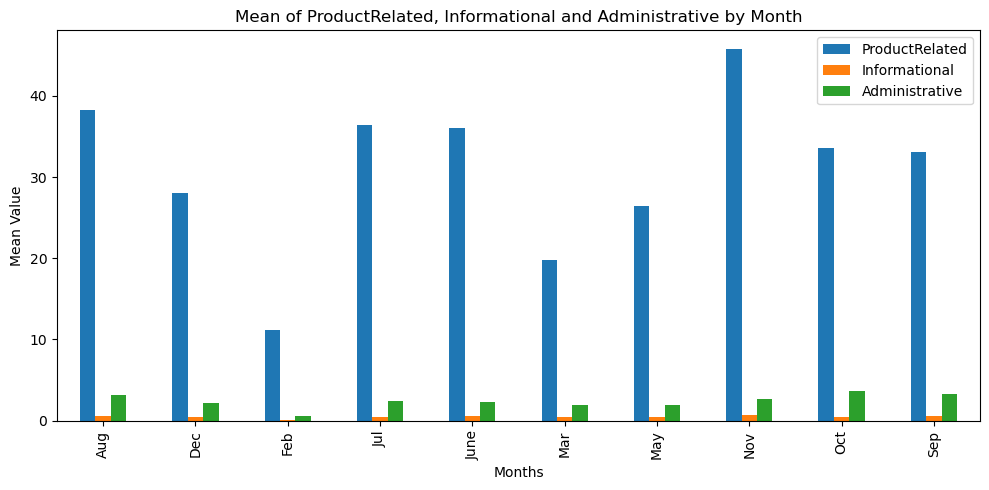

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

datos.groupby("Month")[["ProductRelated", "Informational", "Administrative"]].mean().plot(
    kind="bar", 
    figsize=(10,5)
)

plt.xlabel("Months")
plt.ylabel("Mean Value")
plt.title("Mean of ProductRelated, Informational and Administrative by Month")
plt.tight_layout()
plt.show()


## Los navegadores utilizados para acceder a la página: 
Este gráfico nos ayuda a conocer qué browsers son los más utilizados por los usuarios, para ayudarnos a tomar la decisión de en cuales hace falta una mayor promoción.

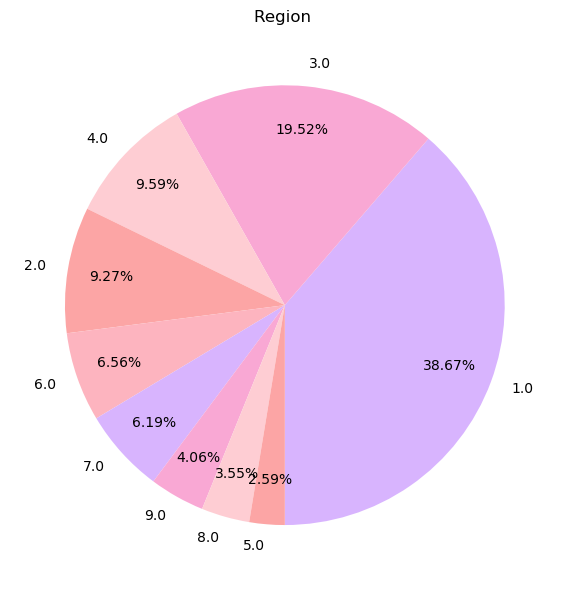

In [38]:
from itertools import cycle
import matplotlib.pyplot as plt

tipo = datos["Region"].value_counts()
tipo_rel = tipo / tipo.sum()

plt.figure(figsize=(6,6))

colores_pastel = [
    "#d8b4fe",
    "#f9a8d4",
    "#fecdd3",
    "#fca5a5",
    "#fdb4bf"
]

colores_finales = [c for c, _ in zip(cycle(colores_pastel), range(len(tipo_rel)))]

plt.pie(
    tipo_rel,
    labels=tipo_rel.index,
    autopct='%1.2f%%',
    startangle=-450,
    pctdistance=0.8,
    labeldistance=1.1,
    colors=colores_finales
)

plt.title("Region ")
plt.tight_layout()
plt.show()

## Relación entre Informational y Duration
Muestra la relación entre el tiempo en la sección informativa y la cantidad de páginas informativas visitadas, con los datos ordenados por duración. Grafica la evolución de la navegación informativa a medida que pasa el tiempo. Cuando la línea es ascendente, indica que a mayor tiempo, más páginas consultadas; mientras que tramos planos o irregulares corresponden a usuarios que dedican tiempo sin recorrer muchas páginas.

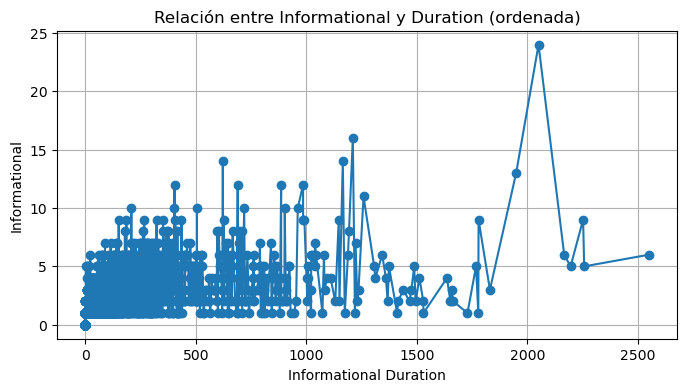

In [39]:

grupo = datos.groupby("VisitorType")[["Administrative"]]
df = datos.sort_values("Informational_Duration")

plt.figure(figsize=(8, 4))
plt.plot(df["Informational_Duration"], df["Informational"], marker="o")
plt.xlabel("Informational Duration")
plt.ylabel("Informational")
plt.title("Relación entre Informational y Duration (ordenada)")
plt.grid()
plt.show()



## Relación entre Administrative y Duration
Permite analizar ela cantidad de páginas administrativas visitadas en función del tiempo dedicado, ordena los registros por duración. Cada curva ascendente señala que más tiempo implica mayor número de páginas visitadas; irregularidades o segmentos planos señalan diferencias en cómo los usuarios web emplean el tiempo en esta sección.

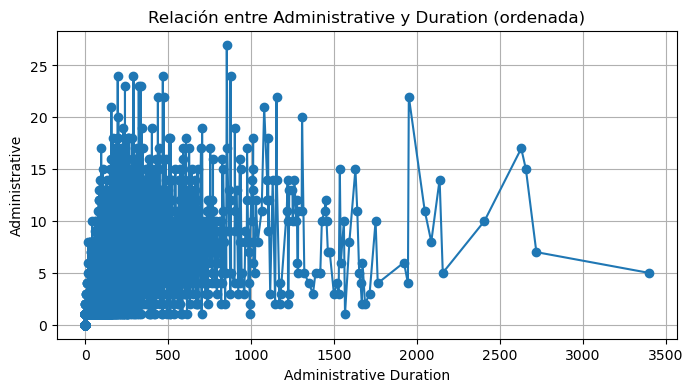

In [40]:
grupo = datos.groupby("VisitorType")[["Administrative"]]
df = datos.sort_values("Administrative_Duration")

plt.figure(figsize=(8, 4))
plt.plot(df["Administrative_Duration"], df["Administrative"], marker="o")
plt.xlabel("Administrative Duration")
plt.ylabel("Administrative")
plt.title("Relación entre Administrative y Duration (ordenada)")
plt.grid()
plt.show()


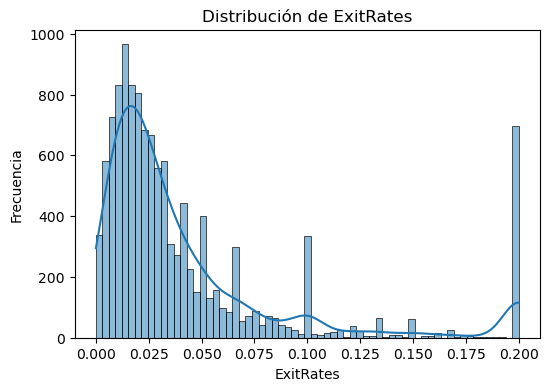

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#distribución de ExitRates

plt.figure(figsize=(6,4))
sns.histplot(datos['ExitRates'], kde=True)
plt.title("Distribución de ExitRates")
plt.xlabel("ExitRates")
plt.ylabel("Frecuencia")
plt.show()

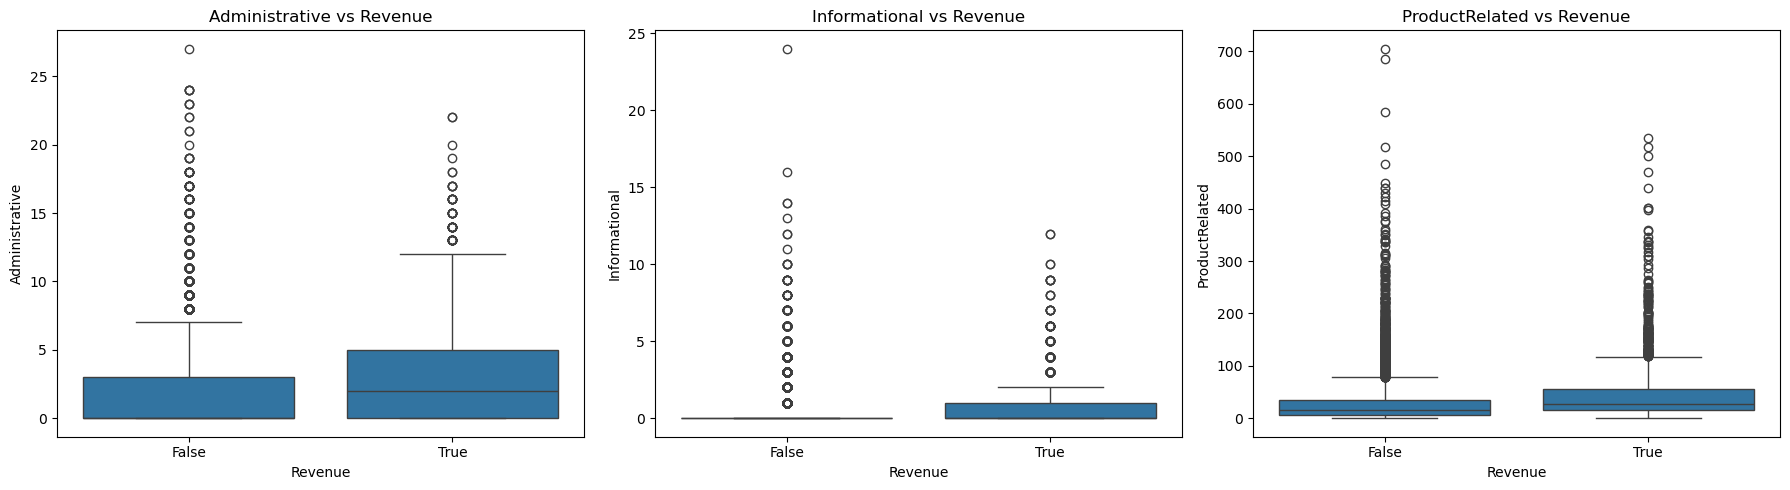

In [55]:
numeric_cols = ['Administrative', 'Informational', 'ProductRelated']

# Crear figura con 2 filas y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 18x8 ajusta el tamaño de toda la figura
axes = axes.flatten()  # Aplanamos para iterar fácilmente

# Iterar sobre cada columna y su respectivo axis
for i, col in enumerate(numeric_cols):
    sns.boxplot(x="Revenue", y=col, data=datos, ax=axes[i])
    axes[i].set_title(f"{col} vs Revenue")

plt.tight_layout()
plt.show()

El gráfico compara la distribución de ExitRates en sesiones con ingresos (Revenue=True) y sin ingresos (Revenue=False). Cada caja muestra el rango intercuartílico, la línea interna es la mediana y los puntos fuera del “bigote” son valores atípicos.

Las sesiones que generan ingresos tienen medianas de ExitRate más bajas, indicando que los usuarios que convierten tienden a permanecer más tiempo. Las sesiones sin ingresos muestran mayor dispersión y más valores extremos, reflejando comportamientos muy variados. Un ExitRate bajo se asocia con mayor probabilidad de conversión.

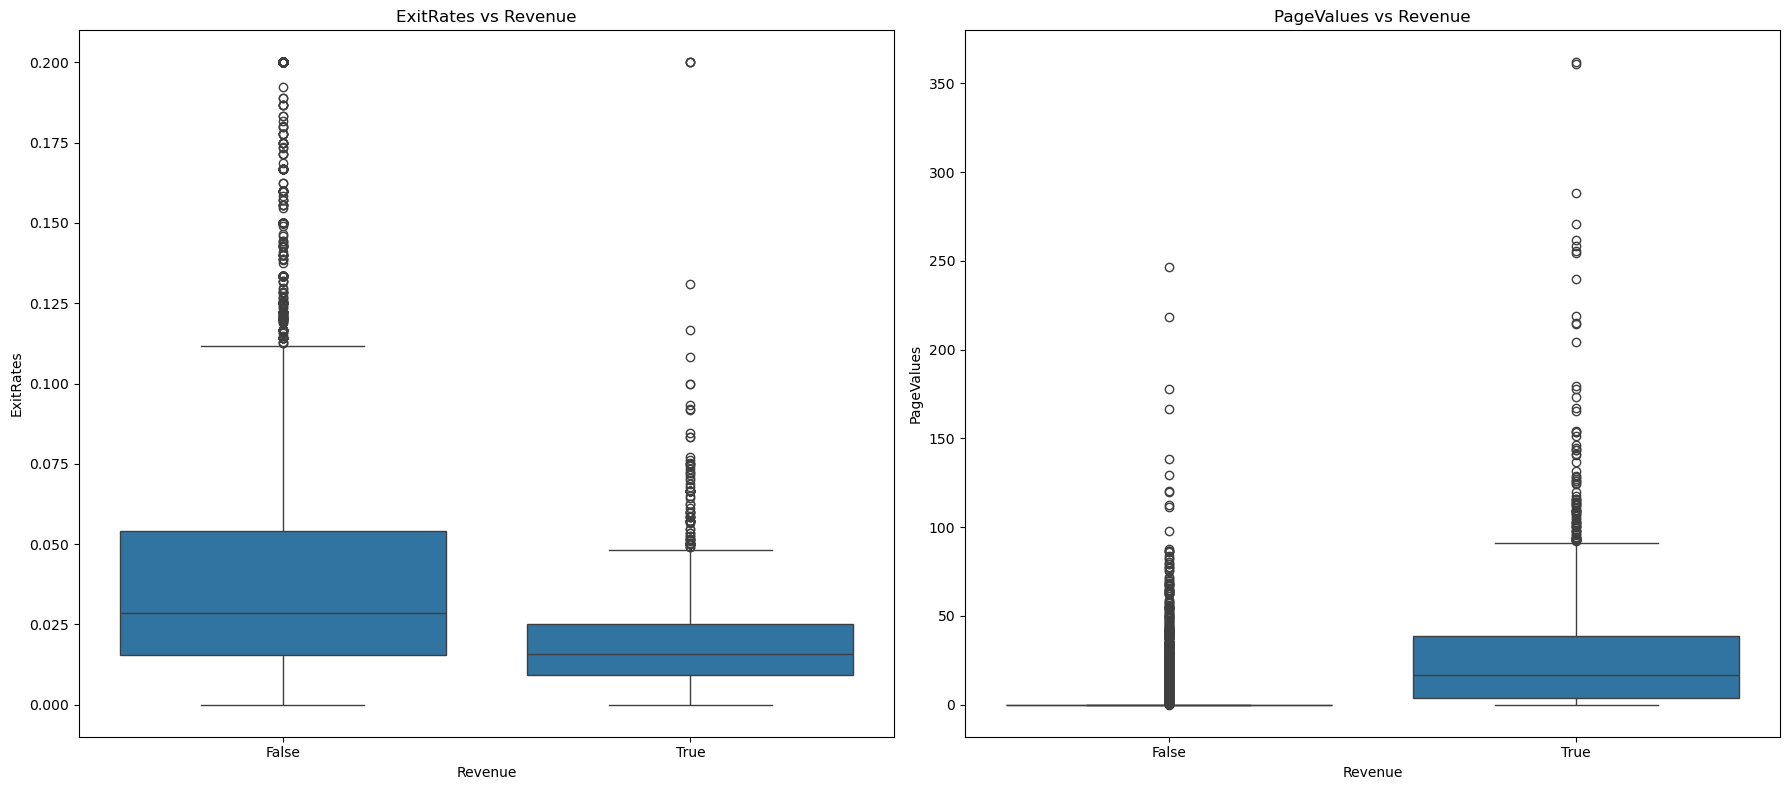

In [56]:
numeric_cols = ['ExitRates', 'PageValues']

# Crear figura con 2 filas y 3 columnas
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 18x8 ajusta el tamaño de toda la figura
axes = axes.flatten()  # Aplanamos para iterar fácilmente

# Iterar sobre cada columna y su respectivo axis
for i, col in enumerate(numeric_cols):
    sns.boxplot(x="Revenue", y=col, data=datos, ax=axes[i])
    axes[i].set_title(f"{col} vs Revenue")

plt.tight_layout()
plt.show()

## Gráfico de barras: Revenue a lo largo de los meses
El gráfico muestra cómo varía la proporción de usuarios que completan o no la compra (Revenue) a lo largo de los diferentes meses del año.
Se pueden observar fluctuaciones mensuales en la tasa de conversión, con algunos meses mostrando un mayor número de usuarios que finalizan la compra y otros donde la conversión es menor.
Estas variaciones podrían estar relacionadas con factores como promociones, eventos especiales, o cambios en el comportamiento de los usuarios. Por ejemplo, noviembre es el mes en el que más usuarios finalizan la compra lo que estaría relacionado con la promoción anual de “Black Friday”.


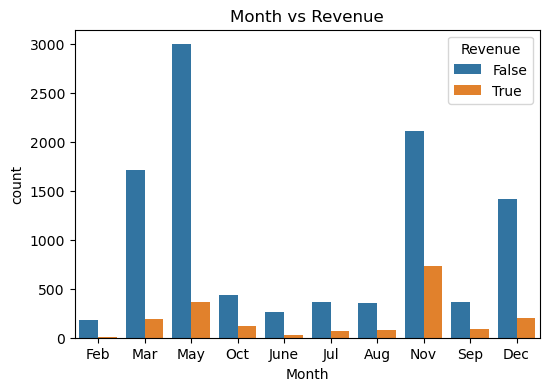

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(x='Month', hue='Revenue', data=datos)
plt.title("Month vs Revenue")
plt.show()

## Gráfico de barras: Revenue a lo largo de los meses
El gráfico muestra la proporción de usuarios que completan la compra según el tipo de visitante: nuevo o recurrente.
La mayoría de los visitantes, tanto recurrentes como nuevos, no finalizan la compra, aunque los recurrentes representan la mayor parte del tráfico del sitio.
Esto indica que la tasa de conversión es baja en general, pero mejorar la experiencia de los usuarios recurrentes podría tener un mayor impacto en los ingresos potenciales.
Analizar estos patrones ayuda a identificar qué segmentos requieren incentivos o mejoras específicas para aumentar la conversión y fidelización.


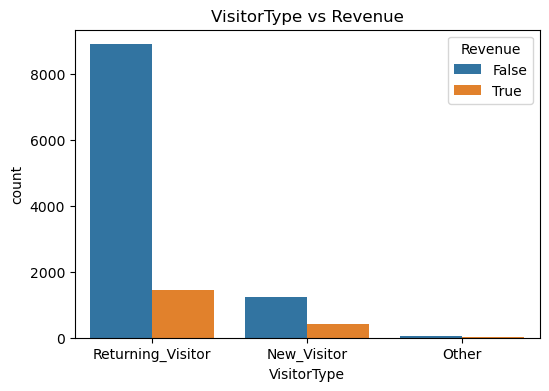

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(x='VisitorType', hue='Revenue', data=datos)
plt.title("VisitorType vs Revenue")
plt.show()

## Gráfico de barras: Weekend vs Revenue
El gráfico muestra la proporción de usuarios que completan la compra (Revenue) según si la visita ocurrió durante el fin de semana o en días laborables.
Se puede observar si los usuarios tienden a convertir más en fines de semana o entre semana.
Estas diferencias reflejan cómo el momento de la visita influye en la decisión de compra.
Analizar esta información permite identificar patrones de comportamiento temporal y planificar estrategias de marketing o promociones específicas según el día de la semana.
Comprender la influencia del fin de semana en la conversión ayuda a optimizar campañas y mejorar la experiencia de usuario en los momentos de mayor actividad.


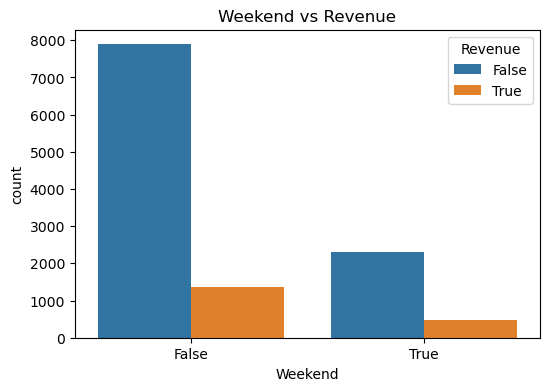

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(x='Weekend', hue='Revenue', data=datos)
plt.title("Weekend vs Revenue")
plt.show()


In [30]:
## Paginas por tipo de visitante

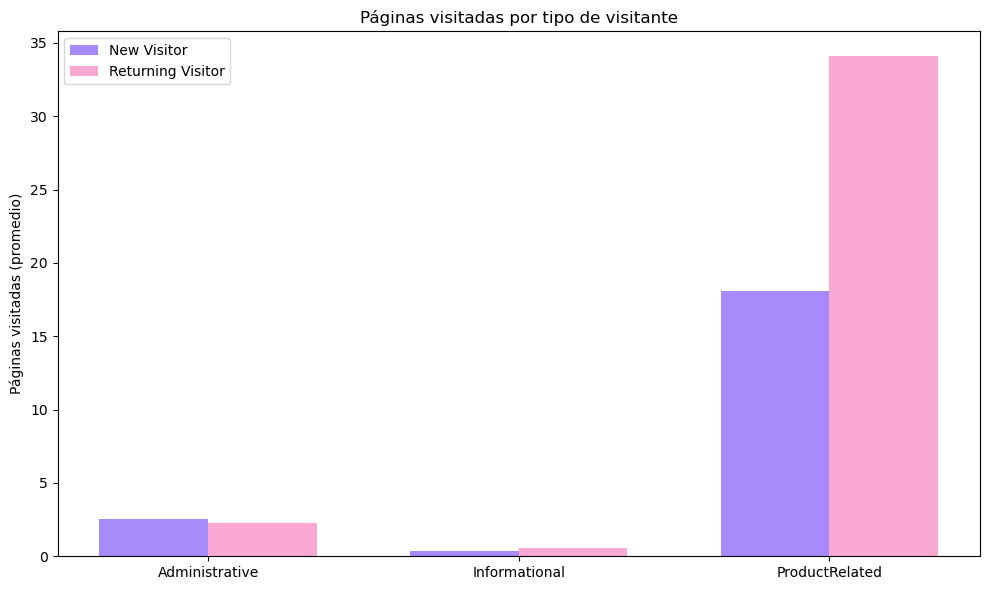

In [22]:

grupo = datos.groupby("VisitorType")[["Administrative",
                                      "Informational",
                                      "ProductRelated"]].mean()
grupo = grupo.loc[["New_Visitor", "Returning_Visitor"]]
plt.figure(figsize=(10,6))

x = range(len(grupo.columns))

new_vals = grupo.loc["New_Visitor"]
ret_vals = grupo.loc["Returning_Visitor"]

width = 0.35

plt.bar([i - width/2 for i in x], new_vals, width=width,
        label="New Visitor", color="#a78bfa")
plt.bar([i + width/2 for i in x], ret_vals, width=width,
        label="Returning Visitor", color="#f9a8d4")  

plt.xticks(x, ["Administrative", "Informational", "ProductRelated"])
plt.ylabel("Páginas visitadas (promedio)")
plt.title("Páginas visitadas por tipo de visitante")
plt.legend()

plt.tight_layout()
plt.show()


## Heatmap: matriz de correlación. 
Muestra la fuerza que tienen las relaciones entre las diferentes variables para saber el peso con el que influye una en otra. El gráfico muestra que BounceRates está muy relacionada con ExitRates con un 0.91, ProductRelated y ProductRelated_Duration también tienen gran peso el uno en el otro. Los que menos correlación tienen son el número de páginas visitadas en la sección administrativa con la tasa de salida lo que indica que en la sección administrativa los usuarios no tienden a salir de la página.


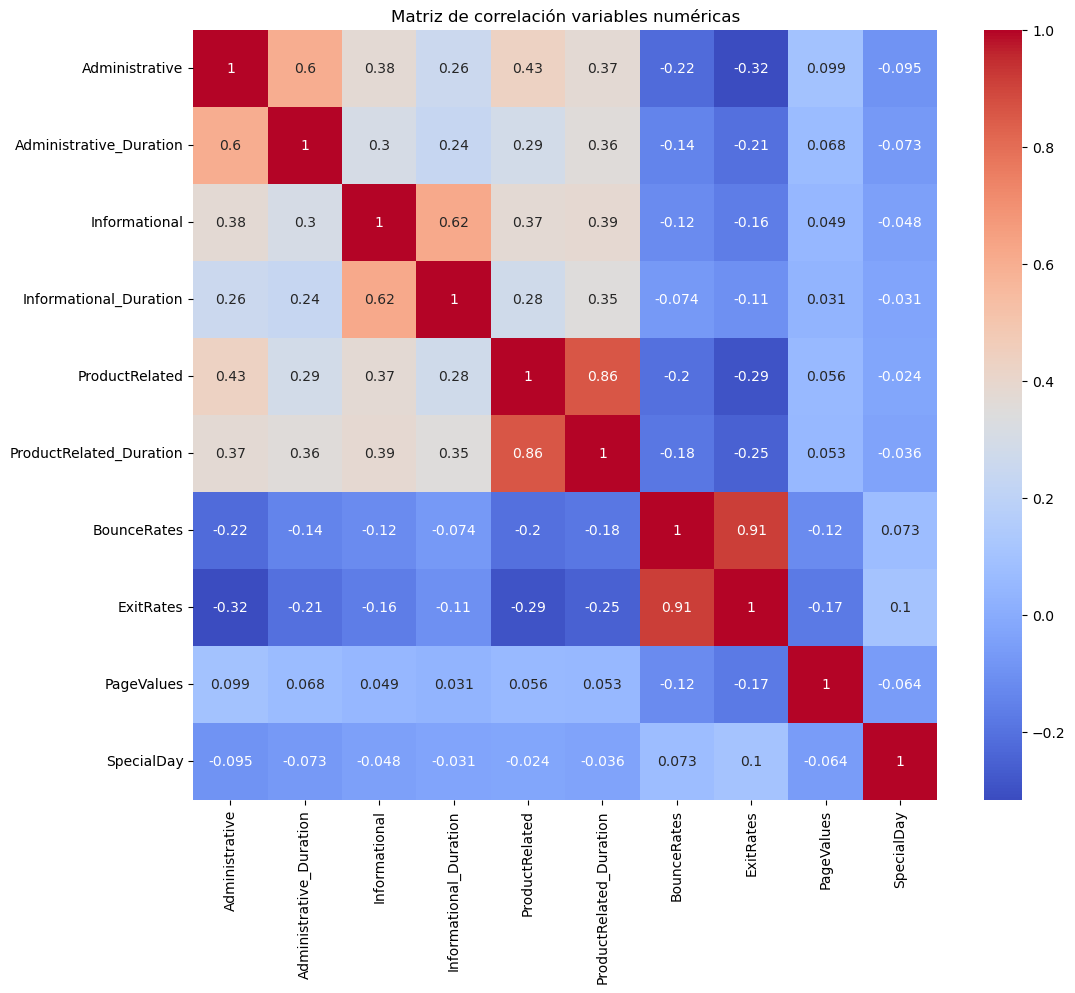

In [23]:
numeric_cols = [ 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay' ]

plt.figure(figsize=(12,10))
sns.heatmap(datos[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación variables numéricas")
plt.show()